

# Project: Web Scrapping and Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analyzing">Analyzing & Visualizing Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitation(s)</a></li>

</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset was scrapped off the website [BasketBall Reference](https://www.basketball-reference.com/awards/awards_1991.html) and it consists of the votings for the National BasketBall Association's (NBA) awards more specifically the Most Valuable Player(MVP) award from 1991 to 2021. 

The dataset includes features such as :


1. Rank



2. Player


3. Age -- Player's age 


4. Tm -- Team

Voting


5. First -- First Place Votes


6. Pts Won -- Points Won


7. Pts Max -- Maximum Points


8. Share


Totals


9. G -- Games
Per Game


10. MP -- Minutes Played Per Game


11. PTS -- Points Per Game


12. TRB -- Total Rebounds Per Game


13. AST -- Assists Per Game


14. STL -- Steals Per Game


15. BLK -- Blocks Per Game
Shooting


16. FG% -- Field Goal Percentage


17. 3P% -- 3-Point Field Goal Percentage


18. FT% -- Free Throw Percentage


Advanced


19. WS -- Win Shares
An estimate of the number of wins contributed by a player.


20. WS/48 -- Win Shares Per 48 Minutes
An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)


21. Year

<a id='gathering'></a>
## Data Gathering

In [1]:
# Importing Necessary Libraries Needed To Scrape The Website
import os
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
#years to scrape the data from
years= list((range(1991,2022)))


In [3]:
url_start = 'https://www.basketball-reference.com/awards/awards_{}.html'

In [4]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}


for year in years:
    try:
        # the url I'm scrapping for each award years
        url = f"https://basketball-reference.com/awards/awards_{year}.html"
        #I used the request lbrary to get the html link
        res = requests.get(url, headers=headers)
        
        #after geting the html, i write the html links into a folder called mvp
        with open(f"mvp/basketball_{year}.html", "w+", encoding="utf-8") as f:
            #use beautiful doup library to get the content of the urls
            soup = BeautifulSoup(res.content, "html.parser")
            f.writelines(str(soup))
    except Exception as e:
        print(e)

In [5]:
#create an empty list to store each scraped table from the website
dfs = []
for year in years:
    #read the html file that was downloaded using beautiful soup
    with open('mvp/basketball_{}.html'.format(year), encoding = 'utf-8') as f:
        page = f.read()
        #make the soup
    soup = BeautifulSoup(page, 'html.parser')
    #use .decompose() to remove the top row from the table as it isnt necessary
    soup.find('tr',class_='over_header').decompose()
    #use beautiful soup to find the most valuable player table
    mvp_table = soup.find(id='mvp')
    #convert the html yable using pandas
    mvp = pd.read_html(str(mvp_table))[0]
    #include a year column to the table to help specify each year of the award as it isnt in the original table
    mvp['Year'] = year
    #append the mvp table to the empty list
    dfs.append(mvp)

In [6]:
#combine the dataframes
mvps = pd.concat(dfs)

In [7]:
mvps.sample(15)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
8,9,Mark Price,29,CLE,0.0,7.0,1010,0.007,76,31.4,...,3.0,7.8,1.4,0.1,0.478,0.397,0.888,10.0,0.201,1994
1,2,LeBron James,35,LAL,16.0,753.0,1010,0.746,67,34.6,...,7.8,10.2,1.2,0.5,0.493,0.348,0.693,9.8,0.204,2020
7,8,Shawn Kemp,26,SEA,0.0,73.0,1130,0.065,79,33.3,...,11.4,2.2,1.2,1.6,0.561,0.417,0.742,11.2,0.205,1996
11,12T,Chauncey Billups,33,DEN,0.0,1.0,1230,0.001,73,34.1,...,3.1,5.6,1.1,0.1,0.418,0.386,0.910,9.5,0.182,2010
0,1,LeBron James,24,CLE,109.0,1172.0,1210,0.969,81,37.7,...,7.6,7.2,1.7,1.1,0.489,0.344,0.780,20.3,0.318,2009
5,6,Dwyane Wade,24,MIA,0.0,87.0,1250,0.070,75,38.6,...,5.7,6.7,1.9,0.8,0.495,0.171,0.783,14.4,0.239,2006
4,5,Chris Paul,35,PHO,2.0,139.0,1010,0.138,70,31.4,...,4.5,8.9,1.4,0.3,0.499,0.395,0.934,9.2,0.201,2021
10,11,Kevin Love,25,MIN,0.0,25.0,1250,0.020,77,36.3,...,12.5,4.4,0.8,0.5,0.457,0.376,0.821,14.3,0.245,2014
1,2,Kawhi Leonard,24,SAS,0.0,634.0,1310,0.484,72,33.1,...,6.8,2.6,1.8,1.0,0.506,0.443,0.874,13.7,0.277,2016
18,17T,Kevin Johnson,30,PHO,0.0,1.0,1150,0.001,70,38.0,...,3.6,9.3,1.5,0.2,0.496,0.441,0.852,11.7,0.211,1997


#### Save gathered dataset to a CSV file named "mvps.csv".

In [8]:
mvps.to_csv('mvps.csv')

In [9]:
df= pd.read_csv('mvps.csv')

In [10]:
df.head(10)

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
5,5,6,Clyde Drexler,28,POR,1.0,75.0,960,0.078,82,...,6.7,6.0,1.8,0.7,0.482,0.319,0.794,12.4,0.209,1991
6,6,7,Kevin Johnson,24,PHO,0.0,32.0,960,0.033,77,...,3.5,10.1,2.1,0.1,0.516,0.205,0.843,12.7,0.220,1991
7,7,8,Dominique Wilkins,31,ATL,0.0,29.0,960,0.030,81,...,9.0,3.3,1.5,0.8,0.470,0.341,0.829,11.4,0.177,1991
8,8,9T,Larry Bird,34,BOS,0.0,25.0,960,0.026,60,...,8.5,7.2,1.8,1.0,0.454,0.389,0.891,6.6,0.140,1991
9,9,9T,Terry Porter,27,POR,0.0,25.0,960,0.026,81,...,3.5,8.0,2.0,0.1,0.515,0.415,0.823,13.0,0.235,1991


In [11]:
df.shape

(474, 22)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  474 non-null    int64  
 1   Rank        474 non-null    object 
 2   Player      474 non-null    object 
 3   Age         474 non-null    int64  
 4   Tm          474 non-null    object 
 5   First       474 non-null    float64
 6   Pts Won     474 non-null    float64
 7   Pts Max     474 non-null    int64  
 8   Share       474 non-null    float64
 9   G           474 non-null    int64  
 10  MP          474 non-null    float64
 11  PTS         474 non-null    float64
 12  TRB         474 non-null    float64
 13  AST         474 non-null    float64
 14  STL         474 non-null    float64
 15  BLK         474 non-null    float64
 16  FG%         474 non-null    float64
 17  3P%         463 non-null    float64
 18  FT%         474 non-null    float64
 19  WS          474 non-null    f

In [13]:
df.dtypes

Unnamed: 0      int64
Rank           object
Player         object
Age             int64
Tm             object
First         float64
Pts Won       float64
Pts Max         int64
Share         float64
G               int64
MP            float64
PTS           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
FG%           float64
3P%           float64
FT%           float64
WS            float64
WS/48         float64
Year            int64
dtype: object

In [14]:
df.isnull().sum()

Unnamed: 0     0
Rank           0
Player         0
Age            0
Tm             0
First          0
Pts Won        0
Pts Max        0
Share          0
G              0
MP             0
PTS            0
TRB            0
AST            0
STL            0
BLK            0
FG%            0
3P%           11
FT%            0
WS             0
WS/48          0
Year           0
dtype: int64

In [15]:
sum(df.duplicated())

0

In [16]:
df.describe()

,Unnamed: 0,Age,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,463.000000,474.000000,474.000000,474.000000,474.000000
mean,7.405063,27.729958,7.544304,196.105485,1153.312236,0.170030,72.962025,36.405063,22.298945,7.501899,5.212447,1.401477,0.970464,0.486865,0.300773,0.781213,10.874895,0.195485,2004.957806
std,4.833863,3.859979,22.870329,316.020240,111.589513,0.272154,10.570344,3.044097,5.132908,3.282469,2.722344,0.539495,0.908948,0.045383,0.126598,0.095520,3.364373,0.047327,8.856043
min,0.000000,19.000000,0.000000,1.000000,960.000000,0.001000,17.000000,25.600000,4.700000,1.900000,0.800000,0.200000,0.000000,0.384000,0.000000,0.422000,2.300000,0.065000,1991.000000
25%,3.000000,25.000000,0.000000,4.000000,1010.000000,0.003000,68.000000,34.600000,19.200000,4.725000,3.000000,1.000000,0.300000,0.456000,0.272000,0.737000,8.800000,0.165250,1997.000000
50%,7.000000,28.000000,0.000000,26.000000,1210.000000,0.024500,77.000000,36.800000,22.500000,6.950000,4.800000,1.400000,0.600000,0.483500,0.334000,0.796000,10.700000,0.195000,2004.000000
75%,11.000000,30.000000,1.000000,260.250000,1240.000000,0.230250,81.000000,38.400000,26.100000,10.275000,6.975000,1.800000,1.375000,0.512750,0.378500,0.848000,13.000000,0.224000,2012.000000
max,20.000000,38.000000,131.000000,1310.000000,1310.000000,1.000000,82.000000,43.700000,36.100000,18.700000,14.200000,3.000000,4.500000,0.675000,1.000000,0.948000,20.400000,0.322000,2021.000000


### Quality Issues

- The column `Unnamed: 0` is unusual and irrelevant as this column doesn't exist on the website scrapped.


- Missing values in the `3P%` column


- The `rank` column appears to be of the wrong datatype.

### Tidiness Issue

- Select players with highest point won for each year as the MVPs .

<a id='cleaning'></a>
### Cleaning Data

In [17]:
# Make A Copy Of The Original Dataset Before Cleaning
df_clean = df.copy()

### Define

1. Drop the column `Unnamed: 0` using Pandas' Drop.

### Code

In [18]:
# Writing a Code that Drops the column "Unnamed: 0"
df_clean.drop(['Unnamed: 0'], axis = 1, inplace = True)

### Test

In [19]:
df_clean.columns

Index(['Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'Year'],
      dtype='object')

In [20]:
df_clean.head(1)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991


### Define

Fill the missing values in the columnn `3P%` using pandas' fillna() method.

### Code

In [21]:
df_clean['3P%']

0      0.312
1      0.320
2      0.143
3      0.284
4      0.286
       ...  
469    0.315
470    0.300
471    0.362
472    0.365
473    0.398
Name: 3P%, Length: 474, dtype: float64

In [22]:
df_clean['3P%'].mean().round(3)

0.301

In [23]:
df_clean['3P%'].fillna(0.301,inplace=True)

### Test

In [24]:
df_clean.isnull().sum()

Rank       0
Player     0
Age        0
Tm         0
First      0
Pts Won    0
Pts Max    0
Share      0
G          0
MP         0
PTS        0
TRB        0
AST        0
STL        0
BLK        0
FG%        0
3P%        0
FT%        0
WS         0
WS/48      0
Year       0
dtype: int64

###### - The `Rank` column appears as a string and this is okay because some of the ranks have letters which signifies a tie i.e 16T signifies that more than one player is ranked 16 because they have the same points. 

### Define


Select players with highest point won for each year as the MVPs .

### Code

In [25]:
df_clean = df_clean.query('Rank == "1"')

### Test

In [26]:
df_clean.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
20,1,Michael Jordan,28,CHI,80.0,900.0,960,0.938,80,38.8,...,6.4,6.1,2.3,0.9,0.519,0.270,0.832,17.7,0.274,1992
37,1,Charles Barkley,29,PHO,59.0,835.0,980,0.852,76,37.6,...,12.2,5.1,1.6,1.0,0.520,0.305,0.765,14.4,0.242,1993
51,1,Hakeem Olajuwon,31,HOU,66.0,889.0,1010,0.880,80,41.0,...,11.9,3.6,1.6,3.7,0.528,0.421,0.716,14.3,0.210,1994
68,1,David Robinson,29,SAS,73.0,901.0,1050,0.858,81,38.0,...,10.8,2.9,1.7,3.2,0.530,0.300,0.774,17.5,0.273,1995


<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "mvpss_clean.csv".

In [27]:
df_clean.to_csv('mvpss_clean.csv', index=False)

<a id='analyzing'></a>
## Analyzing and Visualizing Data

In [28]:
# Importing Necessary Libraries Needed For Visualization.
import seaborn as sns
import matplotlib.pyplot as plt

### Insights and Visualizations :

In [29]:
df=pd.read_csv('mvpss_clean.csv')

### 1. What player has the highest number of MVP award?

In [30]:
mvp_counts = df['Player'].value_counts()
mvp_counts

Michael Jordan           4
LeBron James             4
Giannis Antetokounmpo    2
Karl Malone              2
Stephen Curry            2
Tim Duncan               2
Steve Nash               2
James Harden             1
Russell Westbrook        1
Kevin Durant             1
Derrick Rose             1
Dirk Nowitzki            1
Kobe Bryant              1
Charles Barkley          1
Kevin Garnett            1
Allen Iverson            1
Shaquille O'Neal         1
David Robinson           1
Hakeem Olajuwon          1
Nikola Jokić             1
Name: Player, dtype: int64

In [31]:
mvp_order = mvp_counts.index
mvp_order

Index(['Michael Jordan', 'LeBron James', 'Giannis Antetokounmpo',
       'Karl Malone', 'Stephen Curry', 'Tim Duncan', 'Steve Nash',
       'James Harden', 'Russell Westbrook', 'Kevin Durant', 'Derrick Rose',
       'Dirk Nowitzki', 'Kobe Bryant', 'Charles Barkley', 'Kevin Garnett',
       'Allen Iverson', 'Shaquille O'Neal', 'David Robinson',
       'Hakeem Olajuwon', 'Nikola Jokić'],
      dtype='object')

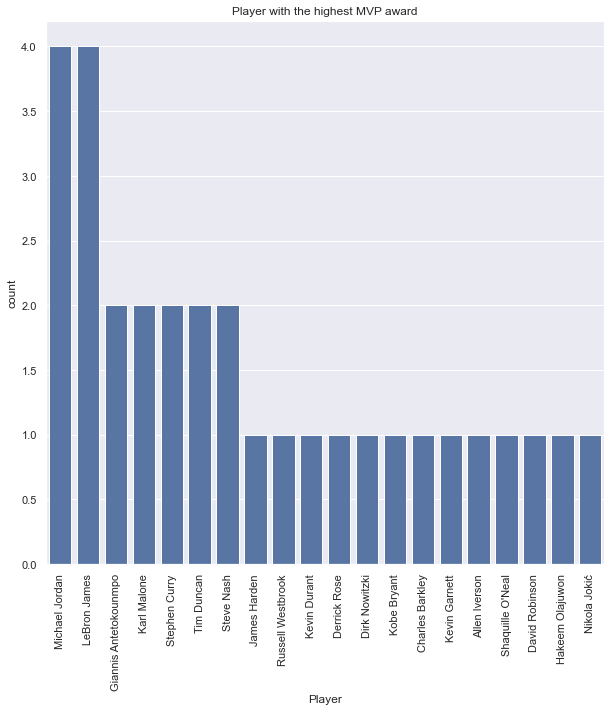

In [40]:
color = sns.color_palette()[0]
sns.countplot(data=df, x='Player', color=color, order = mvp_order)
sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation=90)
plt.title('Player with the highest MVP award')
plt.show()

*From the visualization above Michael Jordan and LeBron James have the highest number of MVP award both winning the award 4 times each.*

### 2. Who is the youngest player to have won the MVP award?

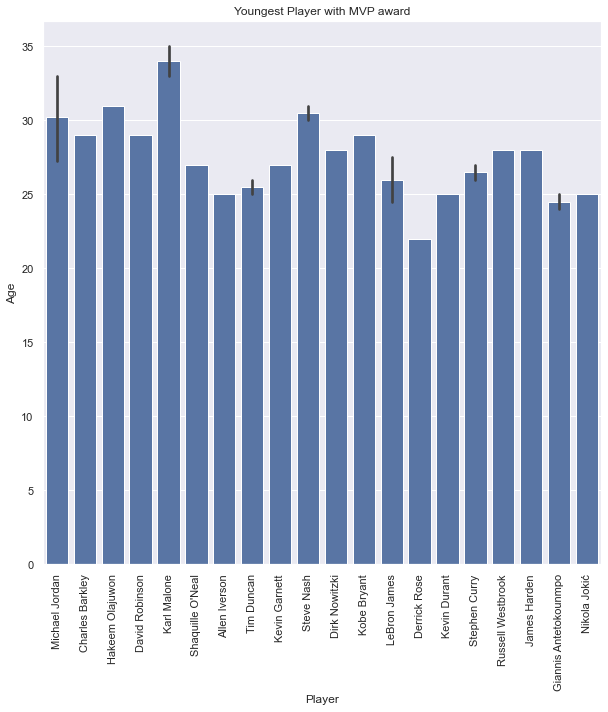

In [41]:
sns.barplot(data=df, x='Player',y='Age', color=color)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(10,10)})
plt.title('Youngest Player with MVP award')
plt.show()

*The visualization above shows that Derrick Rose is the youngest player to have won the MVP award.*

In [34]:
df.query('Player == "Derrick Rose"')

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
20,1,Derrick Rose,22,CHI,113.0,1182.0,1210,0.977,81,37.4,...,4.1,7.7,1.0,0.6,0.445,0.332,0.858,13.1,0.208,2011


### 3. What is the highest points ever won over the years?

In [35]:
#highest point won
df['Pts Won'].max()

1310.0

In [36]:
df[df['Pts Won'] == 1310.0]

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
25,1,Stephen Curry,27,GSW,131.0,1310.0,1310,1.0,79,34.2,...,5.4,6.7,2.1,0.2,0.504,0.454,0.908,17.9,0.318,2016


*The insight above shows that the highest point won over the years is 1310.0 and this was Stephen Curry of Golden State Warriors (GSW)in the year 2016*

### 4. What team produces the most MVP winners?

In [37]:
df.Tm.value_counts()

CHI    5
PHO    3
SAS    3
HOU    2
UTA    2
LAL    2
CLE    2
MIA    2
OKC    2
GSW    2
MIL    2
PHI    1
MIN    1
DAL    1
DEN    1
Name: Tm, dtype: int64

In [38]:
df[df['Tm'] == "CHI"]

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,Michael Jordan,28,CHI,80.0,900.0,960,0.938,80,38.8,...,6.4,6.1,2.3,0.9,0.519,0.270,0.832,17.7,0.274,1992
5,1,Michael Jordan,32,CHI,109.0,1114.0,1130,0.986,82,37.7,...,6.6,4.3,2.2,0.5,0.495,0.427,0.834,20.4,0.317,1996
7,1,Michael Jordan,34,CHI,92.0,1084.0,1160,0.934,82,38.8,...,5.8,3.5,1.7,0.5,0.465,0.238,0.784,15.8,0.238,1998
20,1,Derrick Rose,22,CHI,113.0,1182.0,1210,0.977,81,37.4,...,4.1,7.7,1.0,0.6,0.445,0.332,0.858,13.1,0.208,2011


*The insight above shows that 'CHI' short for Chicago Bulls have five(5) players which includes Michael Jordan(4 awards) and Derrick Rose(1 award) that won the MVP award.*

### 5. Who won the MVP award of the just concluded season (2021/2022) ?

In [39]:
df[df['Year'] == 2021]

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
30,1,Nikola Jokić,25,DEN,91.0,971.0,1010,0.961,72,34.6,...,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301,2021


Turns out Nikola Jokic of the Denver Nuggets won the MVP award for 2021/2022 season.

<a id='conclusions'></a>
## Conclusions
While exploring and analysing the mvps dataset, I loaded the data using pandas and going through the dataset, there were some missing values in the `3P%` column. Also there was no duplicates in the dataset. 

I removed some rows in the original dataset as those rows weren't showing the actual MVP winners and stored the cleaned dataset in a csv file called "mvpss".

After the analysis,I discovered that Michael Jordan and LeBron James have won the highest amount of MVP awards in this dataset both having 4 MVP awards.

The analysis helped me discover that Derrick Rose is the youngest player to have won the MVP award between the year 1991-2021.

I also discovered that the highest points won between 1991-2021 was 1310.0 by Stephen Curry in the year 2016

Further investigations showed that Chicago Bulls (CHI) had the highest number of players that won the MVP award.


I also found that Nikola Jivoc won the MVP award for the 2021/22 season.

<a id='limitations'></a>
### Limitation(s)
1. Data from previous years(1955-1990) weren't gathered and this led to some bias.